<a href="https://colab.research.google.com/github/sarahajbane/colab_workbook_templates/blob/main/Extra_info_on_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64

In [ ]:
# the function to save plots as base64 images
def plot_to_base64(plot_func):
    buf = BytesIO()
    plot_func()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{encoded}" width="200">'

Distribution Type,Purpose,Key Characteristics,Best For,Example
Normal,"Models many natural phenomena, e.g., test scores.","Symmetric, bell-shaped; defined by mean and standard deviation.",Data approximating normality; central limit theorem applications.,
Poisson,Counts of events in a fixed interval or space.,Discrete; non-negative integers; skew depends on mean.,"Event counting, queue lengths, rare occurrences.",
Logistic,"Models growth or change, e.g., population growth.","Symmetric, s-shaped curve; defined by mean and scale.",Modeling growth or decision-making processes.,
Uniform,Models equally likely outcomes over a range.,"Flat, constant probability across a range.","Simulating random processes, gaming, sampling.",
Exponential,Models time between events in a Poisson process.,Skewed; non-negative; exponential decay.,Modeling times between events or rare occurrences.,
Binomial,Models the number of successes in a fixed number of trials.,Discrete; defined by trials and probability of success.,Modeling success/failure experiments.,
Skewed Normal,Combination of normal and skewed (exponential) behavior.,Asymmetric; combines characteristics of normal and exponential distributions.,Modeling data with natural asymmetry or multiple influences.,

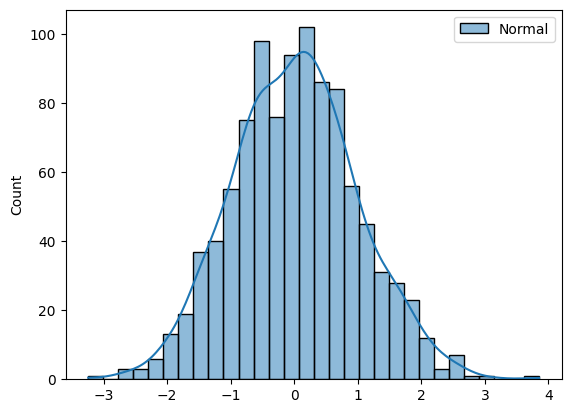
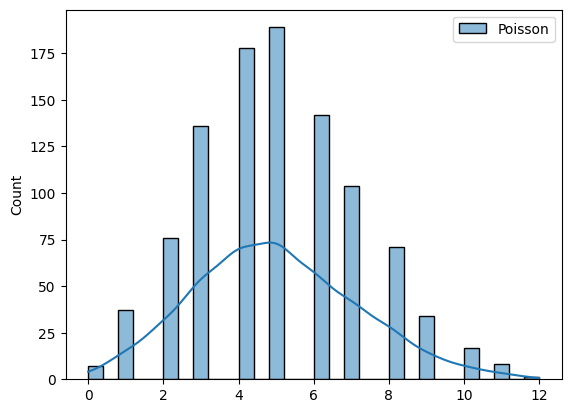
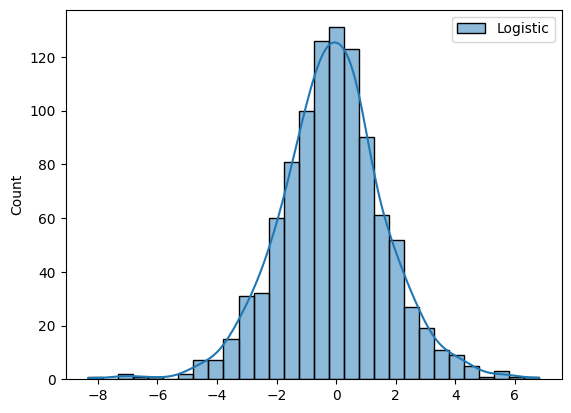
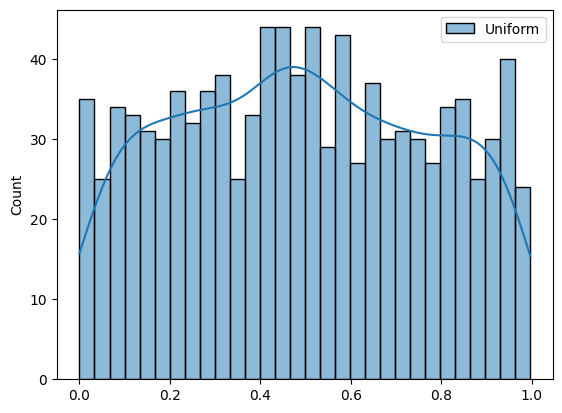
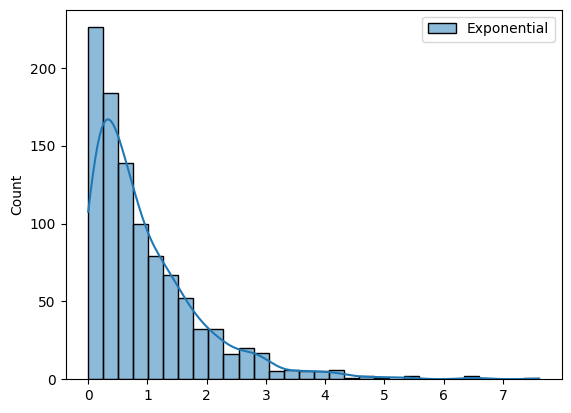
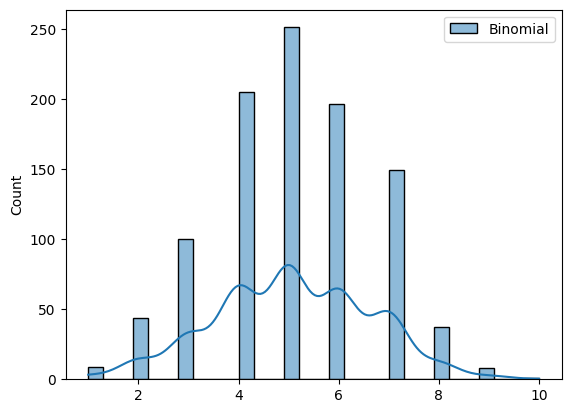
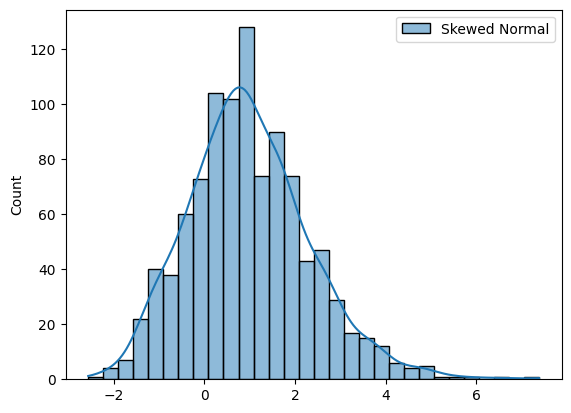

In [ ]:
# We generate sample data for various distributions
np.random.seed(42)
dist_data = {
    "Normal": np.random.normal(0, 1, 1000),
    "Poisson": np.random.poisson(5, 1000),
    "Logistic": np.random.logistic(0, 1, 1000),  # Logistic distribution centered at 0 with scale 1
    "Uniform": np.random.uniform(0, 1, 1000),    # Uniform distribution between 0 and 1
    "Exponential": np.random.exponential(1, 1000),
    "Binomial": np.random.binomial(10, 0.5, 1000),
    "Skewed Normal": np.random.normal(0, 1, 1000) + np.random.exponential(1, 1000)
}

# We prepare visuals for the distributions
dist_visuals = {name: plot_to_base64(lambda name=name: sns.histplot(dist, kde=True, bins=30, label=name).legend())
                for name, dist in dist_data.items()}

# Then, we prepare table data
table_data = {
    "Distribution Type": [
        "Normal", "Poisson", "Logistic", "Uniform", "Exponential", "Binomial", "Skewed Normal"
    ],
    "Purpose": [
        "Models many natural phenomena, e.g., test scores.",
        "Counts of events in a fixed interval or space.",
        "Models growth or change, e.g., population growth.",
        "Models equally likely outcomes over a range.",
        "Models time between events in a Poisson process.",
        "Models the number of successes in a fixed number of trials.",
        "Combination of normal and skewed (exponential) behavior."
    ],
    "Key Characteristics": [
        "Symmetric, bell-shaped; defined by mean and standard deviation.",
        "Discrete; non-negative integers; skew depends on mean.",
        "Symmetric, s-shaped curve; defined by mean and scale.",
        "Flat, constant probability across a range.",
        "Skewed; non-negative; exponential decay.",
        "Discrete; defined by trials and probability of success.",
        "Asymmetric; combines characteristics of normal and exponential distributions."
    ],
    "Best For": [
        "Data approximating normality; central limit theorem applications.",
        "Event counting, queue lengths, rare occurrences.",
        "Modeling growth or decision-making processes.",
        "Simulating random processes, gaming, sampling.",
        "Modeling times between events or rare occurrences.",
        "Modeling success/failure experiments.",
        "Modeling data with natural asymmetry or multiple influences."
    ],
    "Example": [
        dist_visuals["Normal"],
        dist_visuals["Poisson"],
        dist_visuals["Logistic"],
        dist_visuals["Uniform"],
        dist_visuals["Exponential"],
        dist_visuals["Binomial"],
        dist_visuals["Skewed Normal"]
    ]
}

# And finally, we create the DataFrame and render as HTML
dist_table = pd.DataFrame(table_data)

from IPython.core.display import HTML
HTML(dist_table.to_html(escape=False, index=False))